In [1]:
library(stats)
library(nortest)
library(car)
library(reshape2)
library(tidyverse)
library(dplyr)
library(userfriendlyscience)
library(PMCMRplus)
library(nortest)
library(DescTools)
library(readxl)
library(Hmisc)
library(MASS)
library(caret)

Loading required package: carData
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::recode()  masks car::recode()
✖ purrr::some()    masks car::some()

Attaching package: ‘DescTools’

The following object is masked from ‘package:car’:

    Recode

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:userfriendlyscience’:

    oneway

Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile

The following object is ma

Ingest Data 1

In [2]:
data1 <- read.csv('./Data1.csv')

In [3]:
data1 <- data1[,2:4]

In [4]:
data1$Month.Before <- str_replace(data1$Month.Before, '$', '')
data1$Month.After <- str_replace(data1$Month.After, '$', '')

In [5]:
data1$Joined. <- factor(data1$Joined.)
data1$Month.Before <- as.numeric(data1$Month.Before)
data1$Month.After <- as.numeric(data1$Month.After)

In [6]:
head(data1)

,Month.Before,Month.After,Joined.
,<dbl>,<dbl>,<fct>
1,135,154,0
2,35,68,0
3,43,87,0
4,119,159,0
5,63,85,0
6,33,70,0


In [47]:
stack_data1 <- melt(data1, id.vars = 'Joined.')

In [48]:
anova <- aov(stack_data1$value ~ factor(stack_data1$Joined.) + factor(stack_data1$variable) +
            factor(stack_data1$variable) * factor(stack_data1$Joined.))

In [49]:
summary(anova)

                                                          Df Sum Sq Mean Sq
factor(stack_data1$Joined.)                                1 100393  100393
factor(stack_data1$variable)                               1 182516  182516
factor(stack_data1$Joined.):factor(stack_data1$variable)   1  20299   20299
Residuals                                                394 586595    1489
                                                         F value   Pr(>F)    
factor(stack_data1$Joined.)                                67.43 3.16e-15 ***
factor(stack_data1$variable)                              122.59  < 2e-16 ***
factor(stack_data1$Joined.):factor(stack_data1$variable)   13.63 0.000253 ***
Residuals                                                                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [50]:
residuals <- resid(anova)
ad.test(residuals)


	Anderson-Darling normality test

data:  residuals
A = 6.1553, p-value = 3.791e-15


In [51]:
bartlett.test(stack_data1$value ~ factor(stack_data1$Joined.))


	Bartlett test of homogeneity of variances

data:  stack_data1$value by factor(stack_data1$Joined.)
Bartlett's K-squared = 3.4984, df = 1, p-value = 0.06143


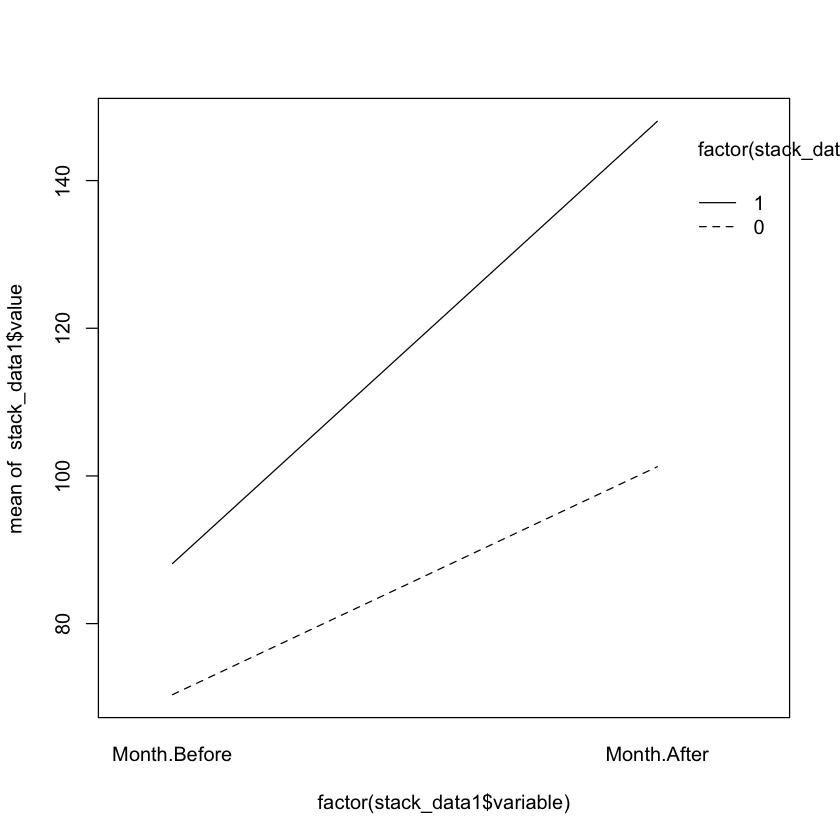

In [52]:
interaction.plot( factor(stack_data1$variable), factor(stack_data1$Joined.),stack_data1$value)

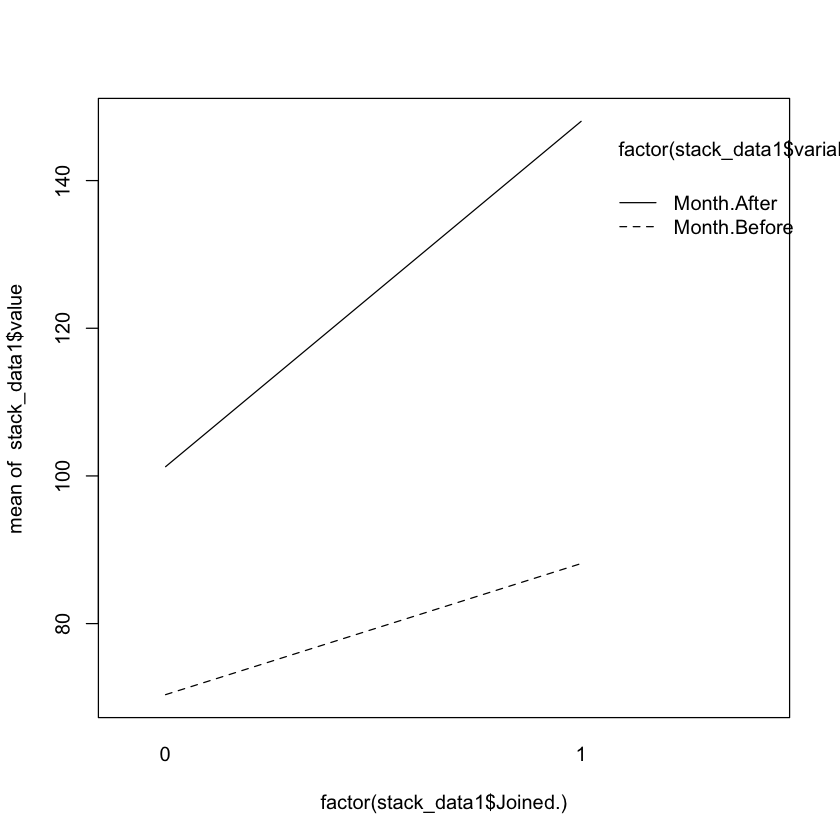

In [53]:
interaction.plot( factor(stack_data1$Joined.), factor(stack_data1$variable), stack_data1$value)

In [ ]:
interaction.plot( factor(stack_data1$variable), factor(stack_data1$Joined.),stack_data1$value)

In [55]:
regression <- lm(data1$Month.After ~ data1$Month.Before + factor(data1$Joined.))
summary(regression)


Call:
lm(formula = data1$Month.After ~ data1$Month.Before + factor(data1$Joined.))

Residuals:
    Min      1Q  Median      3Q     Max 
-16.587  -7.791  -0.371   7.545  16.020 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            29.85711    1.45285   20.55   <2e-16 ***
data1$Month.Before      1.01442    0.01694   59.89   <2e-16 ***
factor(data1$Joined.)1 28.76241    1.32835   21.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.984 on 196 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9611 
F-statistic:  2447 on 2 and 196 DF,  p-value: < 2.2e-16


In [56]:
mean(data1[which(data1$Joined. == 1),]$Month.Before)

[1] 88.13415

In [57]:
mean(data1[which(data1$Joined. == 1),]$Month.After)

[1] 148.0244

In [58]:
mean(data1[which(data1$Joined. == 0),]$Month.Before)

[1] 70.37607

In [59]:
mean(data1[which(data1$Joined. == 0),]$Month.After)

[1] 101.2479

In [60]:
data1$difference  <- data1$Month.After - data1$Month.Before

In [62]:
anova <- aov(data1$difference ~ factor(data1$Joined.))
summary(anova)

                       Df Sum Sq Mean Sq F value Pr(>F)    
factor(data1$Joined.)   1  40597   40597   503.7 <2e-16 ***
Residuals             197  15877      81                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [63]:
residuals <- resid(anova)
ad.test(residuals)


	Anderson-Darling normality test

data:  residuals
A = 2.1948, p-value = 1.375e-05


In [64]:
bartlett.test(data1$difference ~ factor(data1$Joined.))


	Bartlett test of homogeneity of variances

data:  data1$difference by factor(data1$Joined.)
Bartlett's K-squared = 0.035396, df = 1, p-value = 0.8508


In [65]:
kruskal.test(data1$difference ~ factor(data1$Joined.))


	Kruskal-Wallis rank sum test

data:  data1$difference by factor(data1$Joined.)
Kruskal-Wallis chi-squared = 143.52, df = 1, p-value < 2.2e-16


In [7]:
data2 <- read.csv('./Data2.csv')

In [8]:
colnames(data2)

[1] "Customer.ID"                                                     
[2] "Joined."                                                         
[3] "Customer.Age.with.Firm.at.time.of.launching.the.online.community"
[4] "Churned.at.3.months.after.launch.of.the.online.community"        
[5] "Average.Spend.Last.3.months.of.Life.with.the.firm"

In [13]:
colnames(data2) <- c('CustomerID', 'Joined', 'AgeWithFirm', 'ChurnedAtThree', 'AveSpend')

In [57]:
mylogit<-glm(ChurnedAtThree ~ Joined + AgeWithFirm + AveSpend
             ,data=data2,family=binomial(link="logit"))
summary(mylogit)


Call:
glm(formula = ChurnedAtThree ~ Joined + AgeWithFirm + AveSpend, 
    family = binomial(link = "logit"), data = data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6753  -1.2113   0.7973   1.0979   1.2894  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.474797   0.523983   0.906  0.36487   
Joined       0.916584   0.355287   2.580  0.00988 **
AgeWithFirm -0.055849   0.071598  -0.780  0.43537   
AveSpend    -0.002819   0.005655  -0.498  0.61815   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 268.95  on 198  degrees of freedom
Residual deviance: 260.42  on 195  degrees of freedom
AIC: 268.42

Number of Fisher Scoring iterations: 4


In [20]:
preddata<-with(data2,data.frame(Joined, AgeWithFirm, AveSpend))

In [21]:
probchurn <- predict(mylogit,newdata=preddata,type="response")

In [94]:
predchurn<-ifelse(probchurn > 0.50, 1,0)

In [95]:
missclass<-predchurn!=data2$ChurnedAtThree
misclasserror<-mean(predchurn!=data2$ChurnedAtThree)
print(paste('Accuracy',1-misclasserror))

[1] "Accuracy 0.628140703517588"


In [96]:
confMat2<-confusionMatrix(data = as.factor(predchurn),
                          reference = as.factor(data2$ChurnedAtThree),
                          positive = "1")
confMat2

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  24  17
         1  57 101
                                         
               Accuracy : 0.6281         
                 95% CI : (0.557, 0.6954)
    No Information Rate : 0.593          
    P-Value [Acc > NIR] : 0.1743         
                                         
                  Kappa : 0.165          
                                         
 Mcnemar's Test P-Value : 5.797e-06      
                                         
            Sensitivity : 0.8559         
            Specificity : 0.2963         
         Pos Pred Value : 0.6392         
         Neg Pred Value : 0.5854         
             Prevalence : 0.5930         
         Detection Rate : 0.5075         
   Detection Prevalence : 0.7940         
      Balanced Accuracy : 0.5761         
                                         
       'Positive' Class : 1              
                                         

In [90]:
data2$retention <- 1 - probchurn

In [91]:
write.csv(data2, './WithRetention.csv')

In [92]:
mean(data2[which(data2$Joined == 1),]$retention)

[1] 0.2926829

In [93]:
mean(data2[which(data2$Joined == 0),]$retention)

[1] 0.4871795

In [68]:
retention_table <- read.csv('./RetentionTable.csv')

In [69]:
ad.test(retention_table$Joined)


	Anderson-Darling normality test

data:  retention_table$Joined
A = 5.3972, p-value = 1.956e-13


In [71]:
ad.test(retention_table$Did.not)


	Anderson-Darling normality test

data:  retention_table$Did.not
A = 5.8239, p-value = 2.022e-14


In [82]:
wilcox.test(data2[which(data2$Joined == 1),]$retention, 
            data2[which(data2$Joined == 0),]$retention, alternative = 'g', paired = FALSE, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  data2[which(data2$Joined == 1), ]$retention and data2[which(data2$Joined == 0), ]$retention
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0


In [97]:
t.test(data2[which(data2$Joined == 1),]$retention, 
            data2[which(data2$Joined == 0),]$retention, alternative = 'g', paired = FALSE)


	Welch Two Sample t-test

data:  data2[which(data2$Joined == 1), ]$retention and data2[which(data2$Joined == 0), ]$retention
t = -43.711, df = 186.88, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.2018519        Inf
sample estimates:
mean of x mean of y 
0.2926829 0.4871795 


In [36]:
data3 <- read.csv('./Data3.csv')

In [37]:
colnames(data3)

[1] "Campaign.Organic"                                                
[2] "Customer.ID"                                                     
[3] "Month.Before"                                                    
[4] "Month.After"                                                     
[5] "Customer.Age.with.Firm.at.time.of.launching.the.online.community"
[6] "Joined."                                                         
[7] "Churned.at.3.months"                                             
[8] "Average.Spend.Last.3.months.of.Life.with.the.firm"               
[9] "retention"

In [39]:
colnames(data3) <- c('CustomerOrganic', 
                     'CustomerID', 
                     'MonthBefore', 
                     'MonthAfter', 
                     'AgeWithFirm',
                     'Joined', 
                     'ChurnedAtThree', 
                     'AveSpend', 
                     'Retention')

In [58]:
data3$lifetime <- floor(1 / (1 - data3$Retention))

In [59]:
data3$lifetime

[1] 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2
 [75] 1 2 1 2 1 1 2 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1
[112] 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1
[186] 1 1 1 2 1 1 2 1 1 2 1 1 1 1

In [60]:
data3$margin <- data3$AveSpend * 0.5

In [61]:
data3[which(data3$lifetime == 2),]$CLV  <- data3[which(data3$lifetime == 2),]$margin +
(data3[which(data3$lifetime == 2),]$margin * data3[which(data3$lifetime == 2),]$Retention) +
(data3[which(data3$lifetime == 2),]$margin * data3[which(data3$lifetime == 2),]$Retention^2)

In [62]:
data3[which(data3$lifetime == 1),]$CLV  <- data3[which(data3$lifetime == 1),]$margin +
(data3[which(data3$lifetime == 1),]$margin * data3[which(data3$lifetime == 1),]$Retention)

In [63]:
write.csv(data3,  './Data3WithCLV.csv')

In [154]:
data3$month0 <- data3$Average.Spend.Last.3.months.of.Life.with.the.firm

In [155]:
data3$month1 <- data3$Average.Spend.Last.3.months.of.Life.with.the.firm * data3$retention

In [156]:
data3$month2 <- data3$Average.Spend.Last.3.months.of.Life.with.the.firm * data3$retention^2

In [157]:
data3$month3 <- data3$Average.Spend.Last.3.months.of.Life.with.the.firm * data3$retention^3

In [158]:
data3$clv <- data3$month0 + data3$month1 + data3$month2 + data3$month3

In [161]:
write.csv(data3,  './Data3WithCLV.csv')

In [64]:
clv <- read.csv('./CLVTest.csv')

In [85]:
mean(data3[which(data3$Joined == 1), ]$CLV)

[1] 63.99451

In [86]:
mean(data3[which(data3$Joined == 0), ]$CLV)

[1] 54.24345

In [87]:
ad.test(data3[which(data3$Joined == 1), ]$CLV)


	Anderson-Darling normality test

data:  data3[which(data3$Joined == 1), ]$CLV
A = 0.97096, p-value = 0.01378


In [88]:
ad.test(data3[which(data3$Joined == 0), ]$CLV)


	Anderson-Darling normality test

data:  data3[which(data3$Joined == 0), ]$CLV
A = 0.9738, p-value = 0.01378


In [89]:
wilcox.test(data3[which(data3$Joined == 1), ]$CLV, 
            data3[which(data3$Joined == 0), ]$CLV, 
            alternative = 'g', paired = FALSE, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  data3[which(data3$Joined == 1), ]$CLV and data3[which(data3$Joined == 0), ]$CLV
W = 6019, p-value = 0.001126
alternative hypothesis: true location shift is greater than 0
